In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import tikzplotlib as tpl

In [2]:
df = pd.read_csv('oracle_exp1.csv',  sep = ';', index_col=False)

In [3]:
# print(df)

In [4]:
# print(table.loc[:,['data']])

In [5]:
# beta = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3]
beta = [0.1, 0.2]
experiments = [['Uncalibrated', 'DP'], ['Uncalibrated', 'EO'], ['FICO', 'DP'], ['FICO', 'EO']]
exp = ['Synth DP', 'Synth EO', 'FICO DP', 'FICO EO']

In [6]:

errors={}
i = 0
for e in experiments:
    means = []
    stds = []
    for b in beta:
        dfe = df[(df['data']==e[0]) & (df['fair']==e[1])]
        acc = dfe[dfe['beta']==b]['acc']
        err = 1 - acc
        mean = err.mean()
        std = err.std()
        means.append(mean)
        stds.append(std)
    errors[exp[i]] = [np.asarray(means), np.asarray(stds)]
    i+=1
# print(errors)



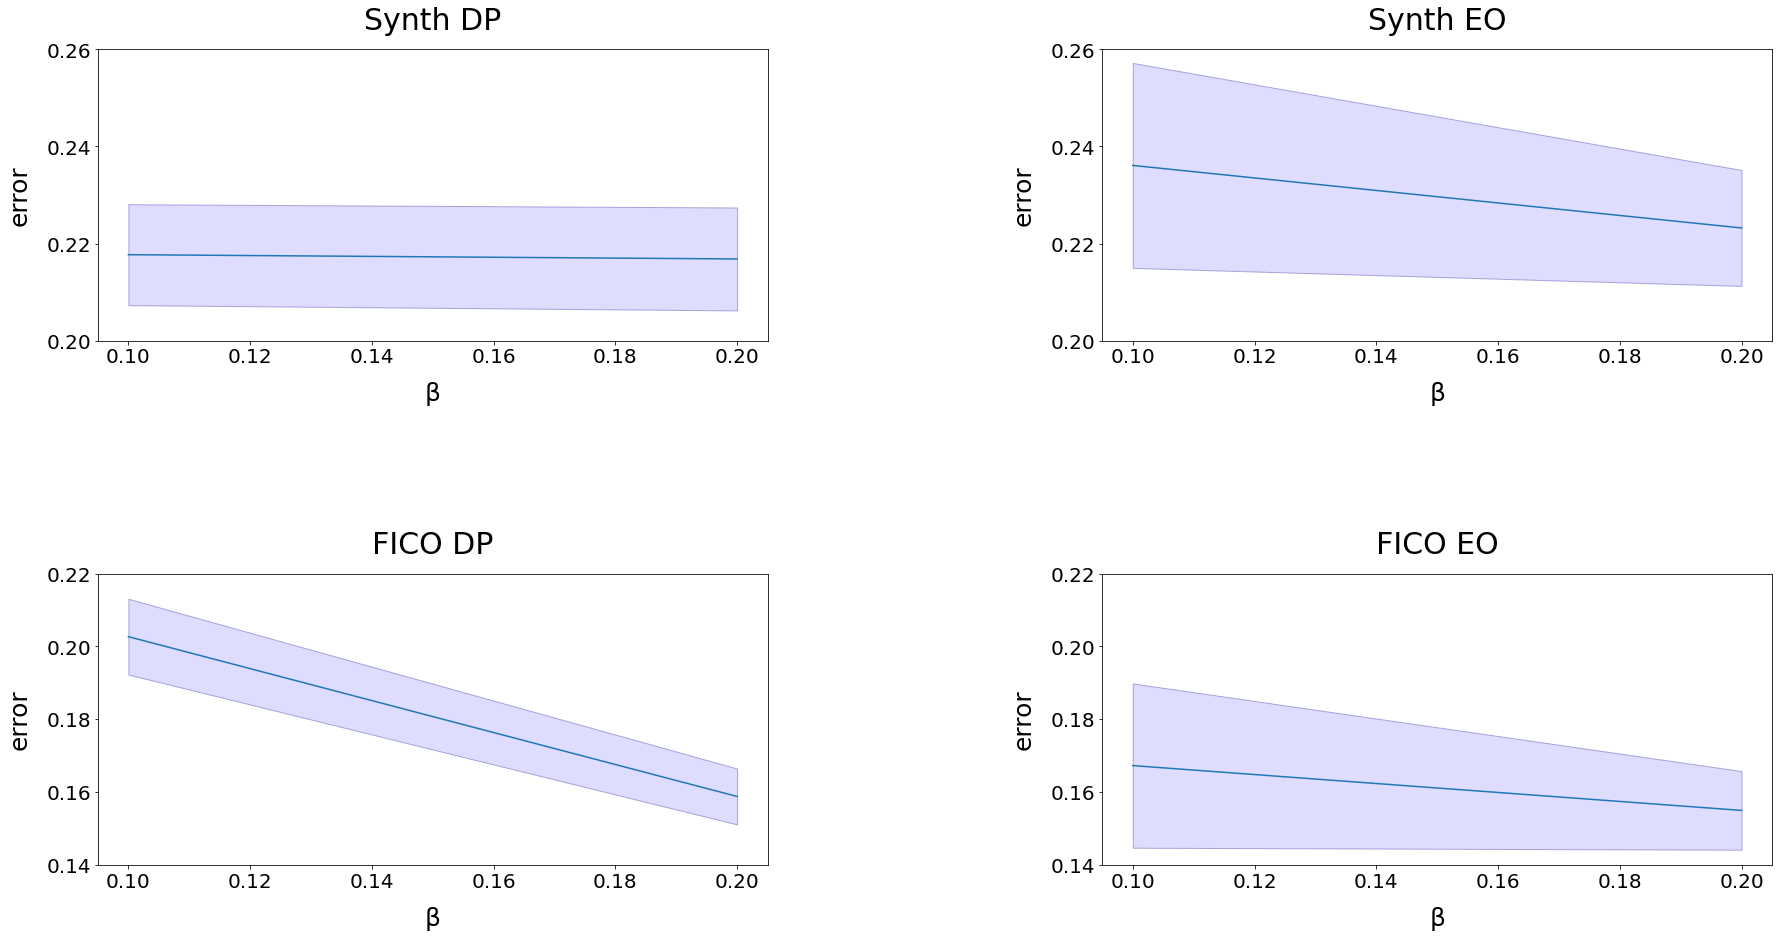

In [7]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

x_label = "\u03B2"


measure_dict = errors

num_columns = 2
num_rows = 2

figure = plt.figure(figsize=(30, 15))
grid = GridSpec(nrows=num_rows, ncols=num_columns, figure=figure)
grid.update(wspace = 0.5, hspace=0.8)

ysetting = [[0.2,0.26], [0.14,0.22]]
current_row = 0
current_column = 0
p = 0
posy = [[0.20, 0.22, 0.24, 0.26],[0.14, 0.16, 0.18, 0.20, 0.22]]
for key, value in measure_dict.items():

    axis = figure.add_subplot(grid[current_row, current_column])

    # 1- because we measure accuracy
    
    err = value[0]
    std = value[1]
    axis.plot(beta, err)
    y_TQ = np.add(err, std )
    y_FQ = np.add(err, -std)

    axis.set_xlabel(x_label, fontsize=25, labelpad =15)
    axis.set_ylabel('error', fontsize=25, labelpad = 15)
    axis.set_title(key, fontsize = 30)
    axis.set_xscale("linear")
    axis.set_ylim(0.1, 0.27)
    
    if p <2:
        axis.set_ylim(ysetting[0])
        axis.set_yticks(posy[0])
    else:
        axis.set_ylim(ysetting[1])
        axis.set_yticks(posy[1])


#     if plot_dict['evaluation'] == 'YES':
#         if current_column == 0 and current_row == 1:
#             axis.set_ylim(-0.5, 0.5)
#         else:
#             axis.set_ylim(0, 1)

    axis.fill_between(beta, y_FQ,
                      y_TQ,
                      alpha=0.3,
                      edgecolor='#060080',
                      facecolor='#928CFF')
    
    for tick in axis.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in axis.yaxis.get_major_ticks():
        tick.label.set_fontsize(20) 


    if current_column == 0 and current_row ==0:
        current_column =1
    elif current_column == 1 and current_row ==0:
        current_row =1
        current_column=0
    else:
        current_column = 1
        current_row = 1

    p+=1

base_save_path = "/Users/mrateike/PycharmProjects/fair_minimonster/final_results"
file_path = "{}/plot_exp1.png".format(base_save_path)
plt.savefig(file_path)
tpl.save(file_path.replace(".png", ".tex"),
         figure=figure,
         axis_width='\\figwidth',
         axis_height='\\figheight',
         tex_relative_path_to_data='.',
         extra_groupstyle_parameters={"horizontal sep=1.2cm"})
plt.show()
plt.close('all')
